<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance (2nd ed.)

**Mastering Data-Driven Finance**

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

<img src="http://hilpisch.com/images/py4fi_2nd_shadow.png" width="300px" align="left">

# Statistics (c)

## Machine Learning

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt
import warnings; warnings.simplefilter('ignore')

In [2]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
np.random.seed(1000)
np.set_printoptions(suppress=True, precision=4)
%matplotlib inline

## Unsupervised Learning

### The Data

In [3]:
from sklearn.datasets.samples_generator import make_blobs

In [4]:
# 产生高斯分布的样本
make_blobs?

Signature:
make_blobs(
    n_samples=100,
    n_features=2,
    *,
    centers=None,
    cluster_std=1.0,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=None,
    return_centers=False,
)
Docstring:
Generate isotropic Gaussian blobs for clustering.

Read more in the :ref:`User Guide <sample_generators>`.

Parameters
----------
n_samples : int or array-like, optional (default=100)
    If int, it is the total number of points equally divided among
    clusters.
    If array-like, each element of the sequence indicates
    the number of samples per cluster.

    .. versionchanged:: v0.20
        one can now pass an array-like to the ``n_samples`` parameter

n_features : int, optional (default=2)
    The number of features for each sample.

centers : int or array of shape [n_centers, n_features], optional
    (default=None)
    The number of centers to generate, or the fixed center locations.
    If n_samples is an int and centers is None, 3 centers are generated.
    If n

In [5]:
# centers = 4，4群
X, y = make_blobs(n_samples=250, centers=4,
                  random_state=500, cluster_std=1.25)  

In [6]:
X

array([[  0.979 ,   0.2556],
       [  2.565 ,   0.0959],
       [ -6.3662,  -3.6989],
       [  0.3346,  -2.2308],
       [ -9.3491,  -1.7698],
       [  3.1493,   1.993 ],
       [ -0.0643,  -2.497 ],
       [  0.1174,  -4.8043],
       [ -0.4314,  -3.7421],
       [ -8.8874,  -1.1915],
       [  5.9695,  -9.3423],
       [  5.1855,  -6.6859],
       [  3.9198,  -7.19  ],
       [  3.8148,  -7.3241],
       [  0.0144,  -3.1052],
       [  3.5505,  -8.6493],
       [  4.1903,  -7.8153],
       [  0.5806,  -4.5646],
       [  0.2006,  -3.2944],
       [  1.611 ,  -8.9998],
       [ -9.5434,  -2.6032],
       [  4.9931,  -7.5615],
       [  1.6909,   0.8842],
       [  3.4296,   0.3938],
       [  2.6911,   1.3915],
       [  3.6923,   0.0239],
       [  0.733 ,  -2.2708],
       [  2.8566,   0.2184],
       [-10.1949,  -2.1758],
       [  3.5671,   3.9083],
       [ -0.1175,  -3.7107],
       [ -1.2342,  -4.2617],
       [ -9.2065,  -1.966 ],
       [  5.0439,  -7.3421],
       [  0.76

In [7]:
y

array([1, 1, 2, 3, 2, 1, 3, 3, 3, 2, 0, 0, 0, 0, 3, 0, 0, 3, 3, 0, 2, 0,
       1, 1, 1, 1, 3, 1, 2, 1, 3, 3, 2, 0, 3, 0, 3, 3, 3, 0, 3, 3, 1, 1,
       1, 2, 0, 1, 3, 0, 1, 0, 2, 0, 2, 1, 1, 0, 2, 2, 1, 3, 3, 2, 0, 0,
       2, 1, 0, 3, 2, 3, 2, 3, 2, 0, 3, 0, 3, 2, 3, 2, 1, 3, 0, 0, 1, 3,
       0, 1, 2, 2, 0, 1, 2, 2, 2, 3, 1, 1, 2, 0, 0, 2, 0, 2, 3, 2, 3, 2,
       0, 1, 1, 1, 2, 3, 2, 1, 3, 1, 1, 1, 3, 3, 3, 3, 0, 1, 1, 2, 0, 0,
       3, 2, 1, 2, 0, 2, 0, 2, 2, 2, 3, 0, 0, 1, 2, 1, 1, 3, 2, 0, 3, 0,
       2, 1, 1, 1, 2, 1, 3, 1, 1, 3, 2, 2, 3, 2, 3, 0, 3, 1, 2, 3, 3, 1,
       2, 3, 1, 0, 2, 0, 0, 3, 1, 2, 2, 1, 0, 2, 2, 3, 0, 1, 0, 0, 1, 2,
       3, 1, 1, 3, 2, 3, 2, 1, 0, 0, 3, 3, 0, 3, 2, 2, 1, 3, 1, 1, 2, 0,
       0, 0, 0, 0, 3, 2, 0, 1, 1, 0, 1, 0, 1, 0, 3, 3, 2, 0, 2, 0, 2, 3,
       0, 0, 1, 1, 0, 3, 2, 1])

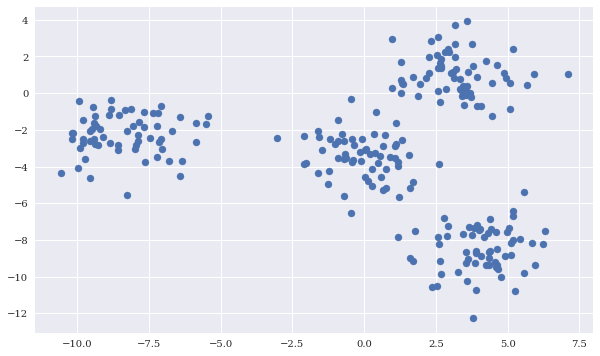

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=50);
# plt.savefig('../../images/ch13/ml_plot_01.png')

### K-Means Clustering
与每一个群中心点计算距离作为目标函数，进行分类

先随机选取一个中心点，然后决定分类。

然后因为已知分类，然后再更改中心点。不断进行循环即可

最终停下的时候可以是循环次数或者目标函数值

In [9]:
from sklearn.cluster import KMeans  

In [10]:
# n_clusters = 4 分成4群
model = KMeans(n_clusters=4, random_state=0)  

In [11]:
model.fit(X)  

KMeans(n_clusters=4, random_state=0)

In [12]:
y_kmeans = model.predict(X)  

In [13]:
y_kmeans[:12]  

array([2, 2, 0, 3, 0, 2, 3, 3, 3, 0, 1, 1])

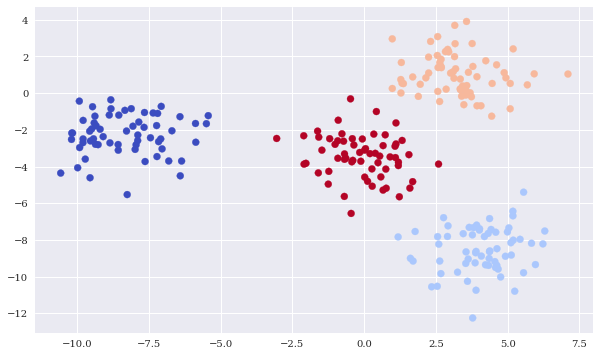

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='coolwarm');
# plt.savefig('../../images/ch13/ml_plot_02.png');

### Gaussian Mixtures

把多个高斯模型线性组合起来

In [23]:
from sklearn.mixture import GaussianMixture

In [24]:
model = GaussianMixture(n_components=4, random_state=0)

In [25]:
model.fit(X)

GaussianMixture(n_components=4, random_state=0)

In [26]:
y_gm = model.predict(X)

In [27]:
y_gm[:12]

array([2, 2, 0, 3, 0, 2, 3, 3, 3, 0, 1, 1], dtype=int64)

In [28]:
(y_gm == y_kmeans).all()  

True

## Supervised Learning

### The Data

In [29]:
# 虚拟分类数据产生器
from sklearn.datasets import make_classification

In [30]:
make_classification?
# n_features: 解释变数。设置成2的话比较容易画图
# n_informative: 实际有用的变量
# n_redundant: 有用的变量线性组合的变量
# n_classes: 两组
# n_clusters_per_class：类似组内还有小组

Signature:
make_classification(
    n_samples=100,
    n_features=20,
    *,
    n_informative=2,
    n_redundant=2,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=2,
    weights=None,
    flip_y=0.01,
    class_sep=1.0,
    hypercube=True,
    shift=0.0,
    scale=1.0,
    shuffle=True,
    random_state=None,
)
Docstring:
Generate a random n-class classification problem.

This initially creates clusters of points normally distributed (std=1)
about vertices of an ``n_informative``-dimensional hypercube with sides of
length ``2*class_sep`` and assigns an equal number of clusters to each
class. It introduces interdependence between these features and adds
various types of further noise to the data.

Without shuffling, ``X`` horizontally stacks features in the following
order: the primary ``n_informative`` features, followed by ``n_redundant``
linear combinations of the informative features, followed by ``n_repeated``
duplicates, drawn randomly with replacement from the infor

In [31]:
n_samples = 100

In [32]:
X, y = make_classification(n_samples=n_samples, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, random_state=250)

In [33]:
X[:5]  

array([[ 1.6876, -0.7976],
       [-0.4312, -0.7606],
       [-1.4393, -1.2363],
       [ 1.118 , -1.8682],
       [ 0.0502,  0.659 ]])

In [34]:
X.shape  

(100, 2)

In [35]:
y[:5]  

array([1, 0, 0, 1, 1])

In [36]:
y.shape  

(100,)

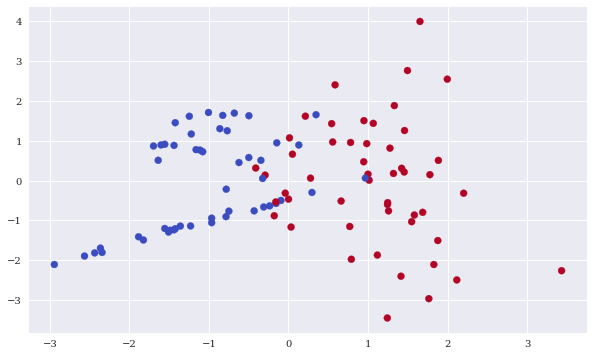

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap='coolwarm');
# plt.savefig('../../images/ch13/ml_plot_03.png')

### Gaussian Naive Bayes

GNB是一个很好的基准，但是一般效果不好

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [39]:
model = GaussianNB()

In [40]:
model.fit(X, y)

GaussianNB()

In [41]:
# 分类的概率结果
model.predict_proba(X).round(4)[:5]  

array([[0.0041, 0.9959],
       [0.8534, 0.1466],
       [0.9947, 0.0053],
       [0.0182, 0.9818],
       [0.5156, 0.4844]])

In [42]:
pred = model.predict(X)  

In [43]:
pred  

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [44]:
pred == y  

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True])

In [45]:
accuracy_score(y, pred)  

0.87

In [46]:
Xc = X[y == pred]  
Xf = X[y != pred]  

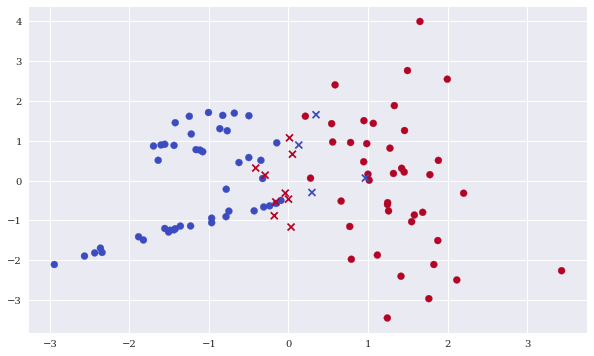

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(x=Xc[:, 0], y=Xc[:, 1], c=y[y == pred],
            marker='o', cmap='coolwarm')  
plt.scatter(x=Xf[:, 0], y=Xf[:, 1], c=y[y != pred],
            marker='x', cmap='coolwarm')  
# plt.savefig('../../images/ch13/ml_plot_04.png')

### Logistic Regression

逻辑回归

直线进行分类的时候，可能会被异常值，极好值影响较大

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
LogisticRegression?
# class_weight：本身分类就有偏的时候需要进行设置

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi

In [53]:
model = LogisticRegression(C=1)

In [54]:
model.fit(X, y)

LogisticRegression(C=1)

In [55]:
model.predict_proba(X).round(4)[:5]

array([[0.011 , 0.989 ],
       [0.7266, 0.2734],
       [0.971 , 0.029 ],
       [0.04  , 0.96  ],
       [0.4843, 0.5157]])

In [56]:
pred = model.predict(X)

In [57]:
accuracy_score(y, pred)

0.9

In [58]:
Xc = X[y == pred]
Xf = X[y != pred]

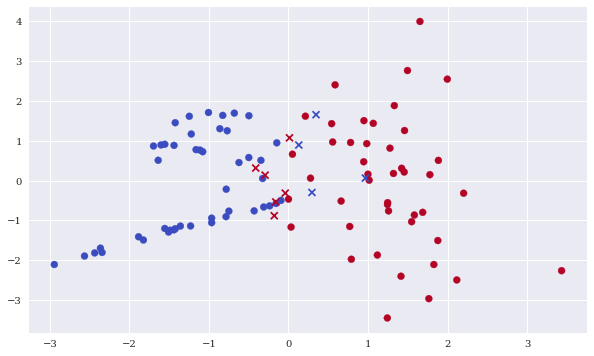

In [59]:
plt.figure(figsize=(10, 6))
plt.scatter(x=Xc[:, 0], y=Xc[:, 1], c=y[y == pred],
            marker='o', cmap='coolwarm')
plt.scatter(x=Xf[:, 0], y=Xf[:, 1], c=y[y != pred],
            marker='x', cmap='coolwarm');

### Decision Tree

决策树，非常明了

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
DecisionTreeClassifier?

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort='deprecated',
    ccp_alpha=0.0,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes

In [62]:
# 最大决策树深度设为1
model = DecisionTreeClassifier(max_depth=1)

In [63]:
model.fit(X, y)

DecisionTreeClassifier(max_depth=1)

In [64]:
model.predict_proba(X).round(4)[:5]

array([[0.08, 0.92],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.08, 0.92],
       [0.08, 0.92]])

In [65]:
pred = model.predict(X)

In [66]:
accuracy_score(y, pred)

0.92

In [67]:
Xc = X[y == pred]
Xf = X[y != pred]

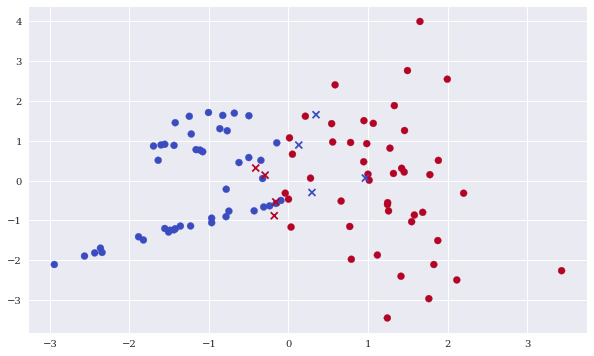

In [68]:
plt.figure(figsize=(10, 6))
plt.scatter(x=Xc[:, 0], y=Xc[:, 1], c=y[y == pred],
            marker='o', cmap='coolwarm')
plt.scatter(x=Xf[:, 0], y=Xf[:, 1], c=y[y != pred],
            marker='x', cmap='coolwarm');
# plt.savefig('../../images/ch13/ml_plot_05.png')

In [52]:
# 深度越高，正确率越高。极限情况可以把所有数据点分割开来。但是会发生overfitting
print('{:>8s} | {:8s}'.format('depth', 'accuracy'))
print(20 * '-')
for depth in range(1, 7):
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X, y)
    acc = accuracy_score(y, model.predict(X))
    print('{:8d} | {:8.2f}'.format(depth, acc))

   depth | accuracy
--------------------
       1 |     0.92
       2 |     0.92
       3 |     0.94
       4 |     0.97
       5 |     0.99
       6 |     1.00


### Deep Neural Network

#### scikit-learn

In [53]:
from sklearn.neural_network import MLPClassifier

In [54]:
model = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=2 * [75], random_state=10)

In [55]:
%time model.fit(X, y)

CPU times: user 1.9 s, sys: 567 ms, total: 2.46 s
Wall time: 455 ms


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[75, 75], learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=10, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [56]:
pred = model.predict(X)
pred

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [57]:
accuracy_score(y, pred)

1.0

#### Keras (instead of TensorFlow 1.x example)

In [58]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [59]:
tf.random.set_seed(1)
np.random.seed(1)

In [60]:
features = 2

In [61]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=features))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop',
              metrics=['accuracy'])

In [62]:
X[:5]

array([[ 1.6876, -0.7976],
       [-0.4312, -0.7606],
       [-1.4393, -1.2363],
       [ 1.118 , -1.8682],
       [ 0.0502,  0.659 ]])

In [63]:
model.fit(X, y, epochs=50, verbose=False)

In [64]:
model.evaluate(X, y)

100/100 [==============================] - 0s 631us/sample - loss: 0.2416 - accuracy: 0.9100


[0.24161519825458527, 0.91]

In [65]:
pred = np.where(model.predict(X) > 0.5, 1, 0)

In [66]:
pred.flatten()

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

## Feature Transforms

In [67]:
from sklearn import preprocessing

In [68]:
X[:5]

array([[ 1.6876, -0.7976],
       [-0.4312, -0.7606],
       [-1.4393, -1.2363],
       [ 1.118 , -1.8682],
       [ 0.0502,  0.659 ]])

In [69]:
Xs = preprocessing.StandardScaler().fit_transform(X)  
Xs[:5]

array([[ 1.2881, -0.5489],
       [-0.3384, -0.5216],
       [-1.1122, -0.873 ],
       [ 0.8509, -1.3399],
       [ 0.0312,  0.5273]])

In [70]:
Xm = preprocessing.MinMaxScaler().fit_transform(X)  
Xm[:5]

array([[0.7262, 0.3563],
       [0.3939, 0.3613],
       [0.2358, 0.2973],
       [0.6369, 0.2122],
       [0.4694, 0.5523]])

In [71]:
Xn1 = preprocessing.Normalizer(norm='l1').transform(X)  
Xn1[:5]

array([[ 0.6791, -0.3209],
       [-0.3618, -0.6382],
       [-0.5379, -0.4621],
       [ 0.3744, -0.6256],
       [ 0.0708,  0.9292]])

In [72]:
Xn2 = preprocessing.Normalizer(norm='l2').transform(X)  
Xn2[:5]

array([[ 0.9041, -0.4273],
       [-0.4932, -0.8699],
       [-0.7586, -0.6516],
       [ 0.5135, -0.8581],
       [ 0.076 ,  0.9971]])

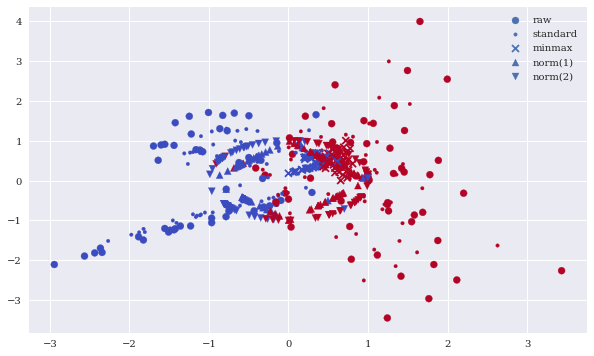

In [73]:
plt.figure(figsize=(10, 6))
markers = ['o', '.', 'x', '^', 'v']
data_sets = [X, Xs, Xm, Xn1, Xn2]
labels = ['raw', 'standard', 'minmax', 'norm(1)', 'norm(2)']
for x, m, l in zip(data_sets, markers, labels):
    plt.scatter(x=x[:, 0], y=x[:, 1], c=y,
            marker=m, cmap='coolwarm', label=l)
plt.legend();
# plt.savefig('../../images/ch13/ml_plot_06.png');

In [74]:
X[:5]

array([[ 1.6876, -0.7976],
       [-0.4312, -0.7606],
       [-1.4393, -1.2363],
       [ 1.118 , -1.8682],
       [ 0.0502,  0.659 ]])

In [75]:
Xb = preprocessing.Binarizer().fit_transform(X)  
Xb[:5]

array([[1., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 1.]])

In [76]:
2 ** 2  

4

In [77]:
Xd = np.digitize(X, bins=[-1, 0, 1])  
Xd[:5]

array([[3, 1],
       [1, 1],
       [0, 0],
       [3, 0],
       [2, 2]])

In [78]:
4 ** 2  

16

## Train-Test Splits 

In [79]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [80]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.33,
                                                    random_state=0)

In [81]:
model = SVC(C=1, kernel='linear')

In [82]:
model.fit(train_x, train_y)  

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [83]:
pred_train = model.predict(train_x)  

In [84]:
accuracy_score(train_y, pred_train)  

0.9402985074626866

In [85]:
pred_test = model.predict(test_x)  

In [86]:
test_y == pred_test  

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False,  True,  True,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True])

In [87]:
accuracy_score(test_y, pred_test)  

0.7878787878787878

In [88]:
test_c = test_x[test_y == pred_test]
test_f = test_x[test_y != pred_test]

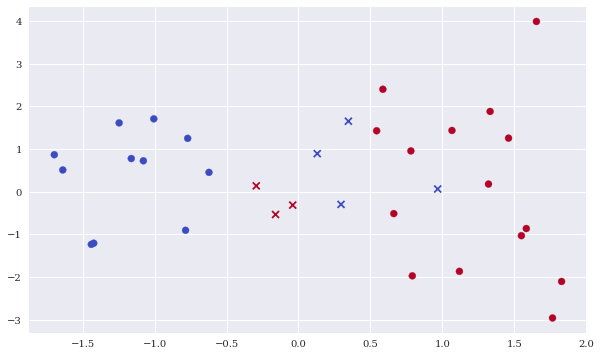

In [89]:
plt.figure(figsize=(10, 6))
plt.scatter(x=test_c[:, 0], y=test_c[:, 1], c=test_y[test_y == pred_test],
            marker='o', cmap='coolwarm')
plt.scatter(x=test_f[:, 0], y=test_f[:, 1], c=test_y[test_y != pred_test],
            marker='x', cmap='coolwarm');
# plt.savefig('../../images/ch13/ml_plot_07.png');

In [90]:
bins = np.linspace(-4.5, 4.5, 50)

In [91]:
Xd = np.digitize(X, bins=bins)

In [92]:
Xd[:5]

array([[34, 21],
       [23, 21],
       [17, 18],
       [31, 15],
       [25, 29]])

In [93]:
train_x, test_x, train_y, test_y = train_test_split(Xd, y, test_size=0.33,
                                                    random_state=0)

In [94]:
print('{:>8s} | {:8s}'.format('kernel', 'accuracy'))
print(20 * '-')
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    model = SVC(C=1, kernel=kernel)
    model.fit(train_x, train_y)
    acc = accuracy_score(test_y, model.predict(test_x))
    print('{:>8s} | {:8.3f}'.format(kernel, acc))

  kernel | accuracy
--------------------
  linear |    0.848
    poly |    0.818
     rbf |    0.788
 sigmoid |    0.455


<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>